
# Pandas

`Pandas` to kolejna biblioteka niezbędna do analizy danych w Pythonie. Dostarcza wydajne struktury danych, dzięki którym praca z danymi tabularycznymi staje się prosta i ituicyjna. Celem twórców jest utrzymanie statusu biblioteki niezbędnej do codziennych analiz oraz zdobycie fotela lidera w kategorii najpotężniejszego narzędzia open-source do analizy danych w jakimkolwiek języku programowania. Obecnie, projekt wciąż prężnie się rozwija i jego znajomość jest niezbędna dla każdego danologa.

`Pandas` będzie dobrym wyborem do następujących zastosowań:
* Dane tabularyczne (kolumny jak w SQLu lub Excelu)
* Dane reprezentujące szeregi czasowe
* Macierze,
* Wyniki pomiarów i statystyk.

Dwa główne typy danych w Pythonie to `Series` (jednowymiarowa kolumna) i `DataFrame` (dwuwymiarowa tabela). `Pandas` wykorzystuje w obliczeniach bibliotekę `NumPy` oraz jest przygotowany do integrowania się z wieloma bibliotekami zewnętrznymi.

Mocnymi stronami `Pandas` są między innymi:
* Prosta obsługa brakujących wartości (`NaN`),
* Możliwość modyfikowania rozmiaru `DataFrame`'a - możemy dodawać i usuwać kolumny i wiersze,
* Automatyczne wyrównywanie danych w obliczeniach (jak w `NumPy`),
* Metoda `groupBy` działająca analogicznie jak w SQLu,
* Łatwo stworzyć `DataFrame` na podstawie innego obiektu,
* Cięcie, indeksowanie i tworzenie podzbiorów,
* Łączenie (`join` i `merge`) zbiorów.

***

In [1]:
import numpy as np
import pandas as pd

pd.__version__

s = pd.Series([1, 3, 4, np.nan, 6, 8])
print(s)
dates = pd.date_range("20130101", periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2.dtypes

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01  1.769300  0.017051  0.352081  0.759819
2013-01-02 -0.129158 -0.474075  1.920213  1.737465
2013-01-03 -0.804066 -2.117036 -0.536596 -0.659498
2013-01-04 -0.474351  0.433892  0.234014 -0.729512
2013-01-05 -0.266559 -0.842833  0.473880 -0.385297
2013-01-06 -0.340221  0.354347 -1.083879 -0.152216


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [2]:
"""## Przeglądanie danych
Do przeglądania `DataFrame` służą między innymi następujące pola i metody.
"""

from IPython.display import display

display(df.head())
display(df.tail(3))

print(df.index)
print(df.columns)


,A,B,C,D
2013-01-01,1.769300,0.017051,0.352081,0.759819
2013-01-02,-0.129158,-0.474075,1.920213,1.737465
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498
2013-01-04,-0.474351,0.433892,0.234014,-0.729512
2013-01-05,-0.266559,-0.842833,0.473880,-0.385297


,A,B,C,D
2013-01-04,-0.474351,0.433892,0.234014,-0.729512
2013-01-05,-0.266559,-0.842833,0.473880,-0.385297
2013-01-06,-0.340221,0.354347,-1.083879,-0.152216


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


## DataFrame.to_numpy()
`DataFrame.to_numpy()` jest metodą, która zamienia `DataFrame` na tablicę. 
Problemem jest to, że o ile `DataFrame` może przechowywać dane różnego typu, 
o tyle `ndarray` ma jeden `dtype` na całą tablicę. W związku z tym, może się okazać,
że zajdzie konieczność castowania wszystkich obiektów na `object`.

`df.to_numpy()` będzie operacją błyskawiczną, natomiast `df2.to_numpy()` będzie już relatywnie wolne.


In [3]:
# Commented out IPython magic to ensure Python compatibility.
%timeit df.to_numpy()
%timeit df2.to_numpy()

2.36 µs ± 21.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
69.8 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Dostępnych jest również trochę funkcji użytkowych (util).

In [4]:
print(df.info())  # informacje o DF
print('----')
display(df.describe())  # opis statystyczny
print('----')
display(df.T)  # zamiana wierszy z kolumnami
print('----')
display(df.sort_index(axis=1, ascending=False))  # sortowanie wg indeksu
print('----')
display(df.sort_values(by='B'))  # sortowanie według kolumny

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes
None
----


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.040842,-0.438109,0.226619,0.095127
std,0.916016,0.957019,1.024216,0.967529
min,-0.804066,-2.117036,-1.083879,-0.729512
25%,-0.440819,-0.750643,-0.343944,-0.590948
50%,-0.303390,-0.228512,0.293048,-0.268757
75%,-0.163508,0.270023,0.443430,0.531810
max,1.769300,0.433892,1.920213,1.737465


----


,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.769300,-0.129158,-0.804066,-0.474351,-0.266559,-0.340221
B,0.017051,-0.474075,-2.117036,0.433892,-0.842833,0.354347
C,0.352081,1.920213,-0.536596,0.234014,0.473880,-1.083879
D,0.759819,1.737465,-0.659498,-0.729512,-0.385297,-0.152216


----


,D,C,B,A
2013-01-01,0.759819,0.352081,0.017051,1.769300
2013-01-02,1.737465,1.920213,-0.474075,-0.129158
2013-01-03,-0.659498,-0.536596,-2.117036,-0.804066
2013-01-04,-0.729512,0.234014,0.433892,-0.474351
2013-01-05,-0.385297,0.473880,-0.842833,-0.266559
2013-01-06,-0.152216,-1.083879,0.354347,-0.340221


----


,A,B,C,D
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498
2013-01-05,-0.266559,-0.842833,0.473880,-0.385297
2013-01-02,-0.129158,-0.474075,1.920213,1.737465
2013-01-01,1.769300,0.017051,0.352081,0.759819
2013-01-06,-0.340221,0.354347,-1.083879,-0.152216
2013-01-04,-0.474351,0.433892,0.234014,-0.729512


## Pobieranie danych (select)


In [5]:

print(df['A']) # tylko kolumna A
print('----')
display(df[0:3]) # wiersze od 0 do 2
print('----')
display(df['20130102':'20130104'])  # od 2 do 3 stycznia
print('----')
print(df.loc[dates[0]])  # według wartości w indeksie
print('----')
display(df.loc[:, ['A', 'B']])  # wszystkie wiersze, ale tylko kolumny A i B
print('----')
display(df.loc['20130102':'20130104', ['A', 'B']])  # zakres wierszy
print('----')
print(df.loc['20130102', ['A', 'B']])  # tylko jeden wiersz
print('----')
print(df.loc[dates[0], 'A'])  # jedna komórka
print('----')
print(df.at[dates[0], 'A'])  # jedna komórka
print('----')
display(df.iloc[[3]])  # jeden wiersz, wg numeru wiersza jako DF
display(df.iloc[3])  # jako Series
print('----')
display(df.iloc[3:5, 0:2])  # według indeksów
print('----')
display(df[df.A < 0])  # indeksowanie warunkiem logicznym
print('----')
display(df[df > 0])  # szuka wartości mniejszych od zero

2013-01-01    1.769300
2013-01-02   -0.129158
2013-01-03   -0.804066
2013-01-04   -0.474351
2013-01-05   -0.266559
2013-01-06   -0.340221
Freq: D, Name: A, dtype: float64
----


,A,B,C,D
2013-01-01,1.769300,0.017051,0.352081,0.759819
2013-01-02,-0.129158,-0.474075,1.920213,1.737465
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498


----


,A,B,C,D
2013-01-02,-0.129158,-0.474075,1.920213,1.737465
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498
2013-01-04,-0.474351,0.433892,0.234014,-0.729512


----
A    1.769300
B    0.017051
C    0.352081
D    0.759819
Name: 2013-01-01 00:00:00, dtype: float64
----


,A,B
2013-01-01,1.769300,0.017051
2013-01-02,-0.129158,-0.474075
2013-01-03,-0.804066,-2.117036
2013-01-04,-0.474351,0.433892
2013-01-05,-0.266559,-0.842833
2013-01-06,-0.340221,0.354347


----


,A,B
2013-01-02,-0.129158,-0.474075
2013-01-03,-0.804066,-2.117036
2013-01-04,-0.474351,0.433892


----
A   -0.129158
B   -0.474075
Name: 2013-01-02 00:00:00, dtype: float64
----
1.7692997818229954
----
1.7692997818229954
----


,A,B,C,D
2013-01-04,-0.474351,0.433892,0.234014,-0.729512


A   -0.474351
B    0.433892
C    0.234014
D   -0.729512
Name: 2013-01-04 00:00:00, dtype: float64

----


,A,B
2013-01-04,-0.474351,0.433892
2013-01-05,-0.266559,-0.842833


----


,A,B,C,D
2013-01-02,-0.129158,-0.474075,1.920213,1.737465
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498
2013-01-04,-0.474351,0.433892,0.234014,-0.729512
2013-01-05,-0.266559,-0.842833,0.473880,-0.385297
2013-01-06,-0.340221,0.354347,-1.083879,-0.152216


----


,A,B,C,D
2013-01-01,1.7693,0.017051,0.352081,0.759819
2013-01-02,NaN,NaN,1.920213,1.737465
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,0.433892,0.234014,NaN
2013-01-05,NaN,NaN,0.473880,NaN
2013-01-06,NaN,0.354347,NaN,NaN


In [6]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
display(df2[df2['E'].isin(['two', 'four'])])  # wybór według wartości w komórkach

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1  # dodanie Series jako nowy wiersz
display(df)
print('----')

df.loc[:, 'D'] = np.array([5] * len(df))  # przypisanie numpy array
display(df)
print('----')

df[df > 0] = -df  # przypisanie ujemnych wartości tam gdzie są dodatnie
display(df)


,A,B,C,D,E
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498,two
2013-01-05,-0.266559,-0.842833,0.473880,-0.385297,four


,A,B,C,D,F
2013-01-01,1.769300,0.017051,0.352081,0.759819,NaN
2013-01-02,-0.129158,-0.474075,1.920213,1.737465,1.0
2013-01-03,-0.804066,-2.117036,-0.536596,-0.659498,2.0
2013-01-04,-0.474351,0.433892,0.234014,-0.729512,3.0
2013-01-05,-0.266559,-0.842833,0.473880,-0.385297,4.0
2013-01-06,-0.340221,0.354347,-1.083879,-0.152216,5.0


----


,A,B,C,D,F
2013-01-01,1.769300,0.017051,0.352081,5,NaN
2013-01-02,-0.129158,-0.474075,1.920213,5,1.0
2013-01-03,-0.804066,-2.117036,-0.536596,5,2.0
2013-01-04,-0.474351,0.433892,0.234014,5,3.0
2013-01-05,-0.266559,-0.842833,0.473880,5,4.0
2013-01-06,-0.340221,0.354347,-1.083879,5,5.0


----


,A,B,C,D,F
2013-01-01,-1.769300,-0.017051,-0.352081,-5,NaN
2013-01-02,-0.129158,-0.474075,-1.920213,-5,-1.0
2013-01-03,-0.804066,-2.117036,-0.536596,-5,-2.0
2013-01-04,-0.474351,-0.433892,-0.234014,-5,-3.0
2013-01-05,-0.266559,-0.842833,-0.473880,-5,-4.0
2013-01-06,-0.340221,-0.354347,-1.083879,-5,-5.0


## Praca z brakującymi danymi


In [7]:
display(df)
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])  # wybierz nowy zakres indeksów z DF
display(df1)
df1.loc[dates[0]:dates[1], 'E'] = 1  # ustaw wartość w kolumnie E, w odpowiednich wierszach
display(df1)
df2 = df1.copy()

display(pd.isna(df1))  # sprawdź czy wartości są nan - do indeksowania warunkiem logicznym

display(df1.dropna(how='any'))  # usuń gdy nan jest gdziekolwiek; 'all' gdy tylko we wszystkich kolumnach
display(df2.fillna(value=5))  # wypełnij wartością value

,A,B,C,D,F
2013-01-01,-1.769300,-0.017051,-0.352081,-5,NaN
2013-01-02,-0.129158,-0.474075,-1.920213,-5,-1.0
2013-01-03,-0.804066,-2.117036,-0.536596,-5,-2.0
2013-01-04,-0.474351,-0.433892,-0.234014,-5,-3.0
2013-01-05,-0.266559,-0.842833,-0.473880,-5,-4.0
2013-01-06,-0.340221,-0.354347,-1.083879,-5,-5.0


,A,B,C,D,F,E
2013-01-01,-1.769300,-0.017051,-0.352081,-5,NaN,NaN
2013-01-02,-0.129158,-0.474075,-1.920213,-5,-1.0,NaN
2013-01-03,-0.804066,-2.117036,-0.536596,-5,-2.0,NaN
2013-01-04,-0.474351,-0.433892,-0.234014,-5,-3.0,NaN


,A,B,C,D,F,E
2013-01-01,-1.769300,-0.017051,-0.352081,-5,NaN,1.0
2013-01-02,-0.129158,-0.474075,-1.920213,-5,-1.0,1.0
2013-01-03,-0.804066,-2.117036,-0.536596,-5,-2.0,NaN
2013-01-04,-0.474351,-0.433892,-0.234014,-5,-3.0,NaN


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


,A,B,C,D,F,E
2013-01-02,-0.129158,-0.474075,-1.920213,-5,-1.0,1.0


,A,B,C,D,F,E
2013-01-01,-1.769300,-0.017051,-0.352081,-5,5.0,1.0
2013-01-02,-0.129158,-0.474075,-1.920213,-5,-1.0,1.0
2013-01-03,-0.804066,-2.117036,-0.536596,-5,-2.0,5.0
2013-01-04,-0.474351,-0.433892,-0.234014,-5,-3.0,5.0


## Operacje

In [8]:
print(df.mean())  # domyślnie - dla kolumn
print('----')
print(df.mean(axis=1))  # dla wierszy
print('----')
display(df.apply(np.cumsum))
print('----')
print(df.apply(lambda x: x.max() - x.min()))

A   -0.630609
B   -0.706539
C   -0.766777
D   -5.000000
F   -3.000000
dtype: float64
----
2013-01-01   -1.784608
2013-01-02   -1.704689
2013-01-03   -2.091539
2013-01-04   -1.828451
2013-01-05   -2.116654
2013-01-06   -2.355689
Freq: D, dtype: float64
----


,A,B,C,D,F
2013-01-01,-1.769300,-0.017051,-0.352081,-5,NaN
2013-01-02,-1.898458,-0.491126,-2.272295,-10,-1.0
2013-01-03,-2.702523,-2.608162,-2.808891,-15,-3.0
2013-01-04,-3.176875,-3.042053,-3.042905,-20,-6.0
2013-01-05,-3.443433,-3.884886,-3.516785,-25,-10.0
2013-01-06,-3.783654,-4.239233,-4.600663,-30,-15.0


----
A    1.640142
B    2.099985
C    1.686199
D    0.000000
F    4.000000
dtype: float64


## Łączenie i grupowanie DataFrame


In [9]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]  # podział wg wierszy
print(pieces)
display(pd.concat(pieces))  # konkatenacja
print('----')

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
display(left)
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]}) 
display(right)
merged = pd.merge(left, right, on='key')  # łączenie wg wspólnej kolumny
display(merged)
print('----')

df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
print(s)
df.append(s, ignore_index=True)  # dodaj wiersz, ignorując indeks
display(df)
print('----')


df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

display(df.groupby('A').sum())

display(df.groupby(['A', 'B']).sum())


[          0         1         2         3
0  0.848552 -1.086720  1.046279 -1.126421
1 -1.394710  1.004711 -0.242083  1.094823
2  0.177586 -1.399206  1.582273 -0.889252,           0         1         2         3
3 -1.035898  0.830764  0.098654 -0.923734
4 -0.246560 -1.016565  0.706390  1.335684
5 -0.554785 -0.336911  0.371868 -1.129697
6  1.069555  0.619029  0.193864  0.175363,           0        1         2         3
7  0.732360  0.41212  0.037644  1.213998
8  0.756660 -1.40544 -0.422332 -0.746619
9 -1.539639  0.03092 -0.835127  0.975558]


,0,1,2,3
0,0.848552,-1.086720,1.046279,-1.126421
1,-1.394710,1.004711,-0.242083,1.094823
2,0.177586,-1.399206,1.582273,-0.889252
3,-1.035898,0.830764,0.098654,-0.923734
4,-0.246560,-1.016565,0.706390,1.335684
5,-0.554785,-0.336911,0.371868,-1.129697
6,1.069555,0.619029,0.193864,0.175363
7,0.732360,0.412120,0.037644,1.213998
8,0.756660,-1.405440,-0.422332,-0.746619
9,-1.539639,0.030920,-0.835127,0.975558


----


,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


----
A   -0.708059
B    1.390924
C    0.417057
D   -1.165639
Name: 3, dtype: float64


/var/folders/ym/_gh6nz0s645_5m7746np3tf80000gn/T/ipykernel_3950/1660637019.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)  # dodaj wiersz, ignorując indeks


,A,B,C,D
0,-0.556220,0.408809,-0.712737,-1.729102
1,0.554071,-0.861831,-1.338771,0.824601
2,0.447420,0.942558,-0.018000,1.100089
3,-0.708059,1.390924,0.417057,-1.165639
4,-0.684552,0.728022,-0.163486,-1.346573
5,-0.217034,-0.138852,-1.746241,-0.396300
6,0.728992,-1.247462,0.127776,-0.369237
7,-1.265371,1.305119,2.025867,-0.539116


----


,C,D
A,,
bar,-3.849024,-2.380512
foo,-4.085736,0.284732


C         D
A   B                        
bar one   -1.248353  1.107755
    three -1.048877 -1.763120
    two   -1.551794 -1.725148
foo one   -3.064493 -0.089944
    three  0.018311  1.177471
    two   -1.039554 -0.802794

## Cechy kategorialne

In [10]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
display(df)
print('----')
df["grade"] = df["raw_grade"].astype("category")  # konwersja do typu kategorii
display(df)
print('----')

df["grade"].cat.categories = ["very good", "good", "very bad"]  # ustawienie kategorii
display(df)
print('----')

display(df.sort_values(by="grade")) # sortowanie według zmiennej kategorycznej
print('----')
display(df.groupby("grade").size()) # grupowanie według wartości zmiennej kategorycznej

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


----


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


----


,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


----


,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


----


grade
very good    3
good         2
very bad     1
dtype: int64

## Wizualizacje

<AxesSubplot:>

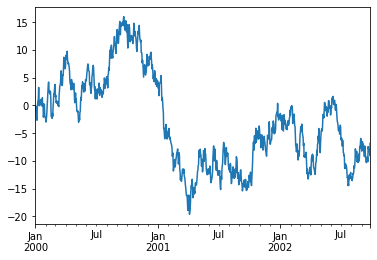

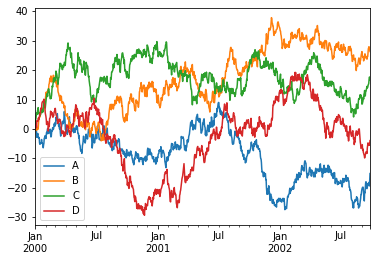

In [11]:
# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()  # zwykły wykres

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()  #dla wielu wymiarów

## Wczytywanie `DataFrame` z pliki i zapis do pliku

In [5]:
from IPython.display import display

# plik tsv - rozdzielony tabulatorami
chipotle = pd.read_csv('ML-datasets-master//chipotle.tsv', sep='\t')
# interesujące parametry: delimiter lub sep (alias), header (czy zawiera linię z opisem kolumn)
# names (lista kolumn), index_col (wybiera daną kolumnę jako indeks)
# usecols (wykorzystuje tylko określone kolumny)
display(chipotle)  # wyświetlamy - macierz z danymi różnych typów
display(chipotle.head())
display(chipotle.tail(3))
display(chipotle.sample(5))


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


,order_id,quantity,item_name,choice_description,item_price
4083,1635,1,Veggie Burrito,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",$8.49
553,230,1,6 Pack Soft Drink,[Diet Coke],$6.49
666,276,1,Chips and Guacamole,NaN,$3.99
3920,1573,1,Chips and Guacamole,NaN,$4.45
403,175,1,Canned Soft Drink,[Coke],$1.25


In [4]:
df.to_csv('foo.csv')  # zapis do pliku

pd.read_csv('foo.csv')  # wczytywanie pliku
df.to_excel('foo.xlsx', sheet_name='Sheet1')  # zapis do formatu Excela

NameError: name 'df' is not defined

W pandasie mamy do czynienia z dwoma typami struktur: Series i Dataframes

**Series** to jednowymiarowa struktura danych (jednowymiarowa macierz numpy), która oprócz danych przechowuje też unikalny indeks. Taką serię możemy utworzyć następująco:
"""

In [ ]:
import numpy as np
import pandas as pd  # konwencja

pd.Series(np.random.random(10))

Drugą strukturą w pandas jest **DataFrame** - czyli dwu lub więcej wymiarowa struktura danych, najczęściej w formie tabeli z wierszami i kolumnami. Kolumny mają nazwy, a wiersze mają indeksy.

W tym szkoleniu skupimy się właśnie na DataFramach.

** Pierwszy krok jest zwykle ten sam. Dane są przechowywane w plikach csv, tsv, bazach danych, plikach excel itd. Wczytać je można np. z użyciem funkcji `pd.read_csv`**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html



In [2]:
import pandas as pd

In [3]:
"""Wczytamy teraz dataset `read_from`"""

read = pd.read_csv('ML-datasets-master/read_from.csv', sep=';',
                  names=['time', 'status', 'country', 'identifier', 'how', 'continent'],
                  parse_dates=True, index_col='time')

display(read.sample(5))

display(read[['country', 'how']])  # wybór wielu kolumn
display(read[['continent']])  # dataframe
display(read['continent'])  # Series
display(read.continent)  # Series

,status,country,identifier,how,continent
time,,,,,
2018-01-01 05:55:31,read,country_5,2458151693,Reddit,South America
2018-01-01 23:29:20,read,country_7,2458153012,AdWords,North America
2018-01-01 12:02:43,read,country_7,2458152154,AdWords,South America
2018-01-01 01:33:24,read,country_6,2458151365,Reddit,Europe
2018-01-01 10:22:10,read,country_5,2458152032,AdWords,North America


,country,how
time,,
2018-01-01 00:01:01,country_7,SEO
2018-01-01 00:03:20,country_7,SEO
2018-01-01 00:04:01,country_7,AdWords
2018-01-01 00:04:02,country_7,AdWords
2018-01-01 00:05:03,country_8,Reddit
...,...,...
2018-01-01 23:57:14,country_2,AdWords
2018-01-01 23:58:33,country_8,SEO
2018-01-01 23:59:36,country_6,Reddit


,continent
time,
2018-01-01 00:01:01,North America
2018-01-01 00:03:20,South America
2018-01-01 00:04:01,Africa
2018-01-01 00:04:02,Europe
2018-01-01 00:05:03,North America
...,...
2018-01-01 23:57:14,North America
2018-01-01 23:58:33,Asia
2018-01-01 23:59:36,Asia


time
2018-01-01 00:01:01    North America
2018-01-01 00:03:20    South America
2018-01-01 00:04:01           Africa
2018-01-01 00:04:02           Europe
2018-01-01 00:05:03    North America
                           ...      
2018-01-01 23:57:14    North America
2018-01-01 23:58:33             Asia
2018-01-01 23:59:36             Asia
2018-01-01 23:59:36           Europe
2018-01-01 23:59:38             Asia
Name: continent, Length: 1795, dtype: object

time
2018-01-01 00:01:01    North America
2018-01-01 00:03:20    South America
2018-01-01 00:04:01           Africa
2018-01-01 00:04:02           Europe
2018-01-01 00:05:03    North America
                           ...      
2018-01-01 23:57:14    North America
2018-01-01 23:58:33             Asia
2018-01-01 23:59:36             Asia
2018-01-01 23:59:36           Europe
2018-01-01 23:59:38             Asia
Name: continent, Length: 1795, dtype: object

W pandasie istnieją co najmniej 4 metody pobierania danych. Pierwsza z nich to zwykłe nawiasy kwadratowe (jak wyżej). Można również w nawiasach podawać warunek logiczny.


In [ ]:
print(read.how == 'SEO')  # Series z wartościami True/False według wierszy
display(read[read.how == 'SEO'])  # Wyświetla wszystkie wiersze dla których było True


Teoretycznie, wiele operacji można wykonywać sekwencyjnie, gdyż większość z nich zwraca wynikową DataFrame.


In [ ]:
read.head()[['country', 'identifier']]


In [ ]:
"""Możemy też wyświetlić indeks i listę kolumn"""

print(read.columns)
print(read.index)

## Różne metody wyboru elementów 


In [ ]:

dates = read.index
print(read['identifier']) # tylko kolumna A
print('----')
display(read[0:3]) # wiersze od 0 do 2
print('----')
display(read['2018-01-01 12:00':'2018-01-01 12:10'])
print('----')
display(read.loc[:, ['country', 'continent']])  # wszystkie wiersze, ale tylko kolumny A i B
print('----')
display(read.loc[dates[0], 'country'])
print('----')
display(read.loc['2018-01-01 12:00':'2018-01-01 12:10', ['country', 'continent']])  # zakres wierszy
print('----')
print(read.loc['2018-01-01 12:00', ['country', 'continent']])  # tylko jeden wiersz
print('----')
print(read.loc[dates[0], 'country'])  # jedna komórka
print('----')
print(read.at[dates[0], 'country'])  # jedna komórka
print('----')
display(read.iloc[[3]])  # jeden wiersz, wg numeru wiersza jako DF
display(read.iloc[3])  # jako Series
print('----')
display(read.iloc[3:5, 0:2])  # według indeksów
print('----')
display(read[read.country == 'country_2'])  # indeksowanie warunkiem logicznym
print('----')
display(read[read != 'Asia'])  # szuka wartości różnych od ''


In [ ]:
"""Porównanie czasu działania numpy i pandas"""

# Import numpy
import numpy as np

iris = pd.read_csv('ML-datasets-master//iris.csv')
iris.pop('species')
f1 = lambda x: np.log10(x.to_numpy())
f2 = lambda x: np.log10(x)

# Commented out IPython magic to ensure Python compatibility.
# Create array of DataFrame values: np_vals with log10
%timeit f1(iris)

# Create array of new DataFrame by passing df to np.log10(): df_log10
%timeit f2(iris)

## Agregacja danych


In [ ]:
"""
Jest to proces łączenia wartości ze zbioru danych (lub jego podzbioru) w jedną wartość.
Przykładowo, mając listę samochodów można zagregować kolumnę ceny do łącznej wartości wszystkich samochodów.
"""

import numpy as np
import pandas as pd

cars = pd.read_csv('ML-datasets-master//auto_mpg.csv', na_values='?')
display(cars)

"""Metoda `count` służy do zliczania liczby elementów w Series. 
Dlatego, też dla całego DataFrame zwróci wartości dla poszczególnych kolumn."""

print(cars.count())

print('----')

# aby uzyskać jedną wartość - wystarczy wybrać jedną kolumnę
print(cars[['mpg']].count())
print(cars.count().mpg)
print(cars.mpg.count())

"""Możemy łatwo zsumować wszystkie wartości, zarówno w kolumnie, jak i macierzy,
ustalić wartość maksymalną i minimalną, średnią czy też medianę."""

print(cars.weight.sum())
print(cars.sum())
print('----')
print(cars.cylinders.min())
print(cars.min())
print('----')
print(cars.acceleration.max())
print(cars.max())
print('----')
print(cars.modelyear.mean())
print(cars.mean())
print('----')
print(cars.mpg.median())
print(cars.median())

In [ ]:
"""Jako Data Scientists od czasu do czasu trzeba wykonać segmentację bazy danych. Oprócz wyznaczania statystyk dla wszystkich wartości, czasem można te wartości pogrupować. W pandasie służy do tego metoda groupby."""

display(cars.groupby('cylinders').mean().horsepower)
display(cars.groupby('modelyear').max()[['acceleration']])

"""W jaki sposób najczęście czytano w zbiorze `read`?"""

read.groupby('how').count()[['identifier']]

"""Jaka była najczęstsza kombinacja źródła i tematu dla kraju `country_2`?"""

read[read.country == 'country_2'].groupby(['how', 'continent']).count()[['identifier']]


## Łączenie dataframes

W rzeczywistości często nie chcemy korzystać z jednej dużej bazy, lecz łączymy wiele mniejszych (łatwiej jest nimi zarządzać, unikać redundancji, dodatkowo oczędzamy miejsce na dysku i osiągamy większą szybkość.

W Pandasie do łączenia dwóch tabel wykorzystujemy funkcję `merge`, która w swoich założeniach jest bardzo podobna do SQL-owego JOINa.


In [ ]:
import pandas as pd
import numpy as np

zoo = pd.read_csv('ML-datasets-master//zoo.csv')
zoo.animal.unique()

zoo_eats = pd.DataFrame({'animal': ['elephant', 'tiger', 'zebra', 'giraffe', 'kangaroo'],
                         'food': ['vegetables', 'meat', 'vegetables', 'vegetables', 'vegetables']})
zoo_eats

zoo.merge(zoo_eats)  # zniknęły lwy, bo nie było ich w zoo_eats

zoo_eats.merge(zoo)  # inna kolejność kolumn

In [ ]:
# inner
zoo.merge(zoo_eats, how='inner')  # domyślne: część wspólna kolumn

In [ ]:
zoo.merge(zoo_eats, how='outer')  # pojawiły się nany - suma


In [ ]:
# left będą dla wartości z zoo
zoo.merge(zoo_eats, how='left')

In [ ]:
# right - odwrotnie
zoo.merge(zoo_eats, how='right')

In [ ]:
# wykorzystywana kolumna
# domyślnie pandas próbuje sam znaleźć, ale często trzeba to zrobić ręcznie
zoo.merge(zoo_eats, how='outer', left_on='animal', right_on='animal')

## Sortowanie w Pandasie

In [ ]:
cars.sort_values('cylinders')


In [ ]:

# sortowanie po wielu kolumnach, według kolejności podania
cars.sort_values(by=['cylinders', 'mpg'])

In [ ]:

# sortowanie malejące
cars.sort_values('horsepower', ascending=False)

In [ ]:
# można by było zresetować indeksy
cars.sort_values('horsepower', ascending=False).reset_index()
# nie tylko że są brzydkie, ale mogą też pomieszać dostęp według numeru indeksu, czy też wizualizacje

In [ ]:
# usuwanie starego indeksu
cars.sort_values('horsepower', ascending=False).reset_index(drop=True)

In [ ]:
# radzenie sobie z wartościami NaN
# wypełnianie wartości NaN
zoo.merge(zoo_eats, how='left').fillna('meat')

In [ ]:
# dropna
zoo.merge(zoo_eats, how='right').dropna()

# Zadania

## Utwórz dwa obiekty typu `pd.Series`, zawierające 100 wartości 0 lub 1. Wykorzystaj w tym celu generator liczb losowych z biblioteki NumPy [np.random.randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html#numpy-random-randint).

Następnie wyświetl wszystkie indeksy, na których wartości w obu Series się zgadzają.

In [ ]:
import numpy as np
import pandas as pd

a = pd.Series(np.random.randint(2, size=100))
b = pd.Series(np.random.randint(2, size=100))
a[a == b].index

## **2. Zbiór chipotle - kto zapłacił najwięcej?**

Wczytaj zbiór chipotle i dodaj kolumne `price_dollars`, zawierającą cenę w dolarach. Następnie sprawdź, które z zamówień opiewało na najwyższą kwotę (wykorzystaj w tym celu grupowanie i wybraną agregację). Podaj jego indeks (`order_id`) oraz wartość zamówienia.


In [ ]:
import pandas as pd

dolarizer = lambda x: float(x[1:])

chipotle = pd.read_csv('ML-datasets-master/chipotle.tsv', sep='\t')
chipotle['price_dollars'] = chipotle.item_price.apply(dolarizer)
price_summed = chipotle.groupby('order_id').price_dollars.sum()
print(f'Order {price_summed.idxmax()}: {price_summed.max()}')

**3. Łączenie DataFrames**

Wczytaj zbiory danych `rating.csv` oraz `parking.csv`. Spróbuj połączyć je wykorzystując metodę `merge`. Pamiętaj o odpowiedniej nazwie kol


In [48]:
import pandas as pd

rating = pd.read_csv('ML-datasets-master//rating.csv')
parking = pd.read_csv('ML-datasets-master/parking.csv')

merged = rating.merge(parking, how='left', on='placeID')
merged.sample(5)

,userID,placeID,rating,food_rating,service_rating,parking_lot
793,U1098,135032,2,1,1,public
962,U1061,132958,2,2,2,none
724,U1048,132755,2,2,2,public
1124,U1129,132654,0,0,0,none
957,U1112,135048,0,0,0,yes
